In [1]:
import skimage
from skimage import io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy
import time
import cv2
import seaborn as sns

In [2]:
#read image.tif as 3D matrix  (N colour channels X shape)

with skimage.external.tifffile.TiffFile('test.tif') as tif:
    data = tif.asarray()
tif.close()

In [3]:
def matrixViz(matrix):
    '''display image matrix as coolwarm'''
    plt.figure(figsize=(10,10))
    plt.imshow(matrix,cmap = 'coolwarm')
    plt.colorbar()


def flattenMatrix(matrix):
    '''flatten 2D matrix values to X,Y,Z arrays for generating viz'''
    YY,XX = np.meshgrid(np.arange(matrix.shape[0]),np.arange(matrix.shape[1]))

    coor_matrix = np.vstack((XX.ravel(),YY.ravel(),matrix.ravel())).T

    x = coor_matrix[:,0]
    y = coor_matrix[:,1]
    z = coor_matrix[:,2]
    return (x,y,z)


def threeDViz(matrix):
    '''display 3d viz of matrix where z = pixel value'''
    coordinates = flattenMatrix(matrix)
    x,y,z = coordinates[0],coordinates[1],coordinates[2]

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    pnt3d=ax.scatter(x,y,z,c=z, cmap = 'coolwarm',s=12)
    cbar=plt.colorbar(pnt3d)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    cbar.set_label("pixel value")                 
    plt.show() 
            
    
def floorValues(matrix,floor_to_zero,floor_difference):
    '''floor pixel values below threshold to zero and floor values to discrete intervals 
    as factors of floor_difference'''
    
    floor_max = 0
    while floor_max <= matrix.max() - floor_difference:
        floor_max = floor_max + floor_difference
    
    matrix[matrix < floor_to_zero] = 0
    matrix[matrix > floor_max] = floor_max
    
    upper_bound = floor_max
    lower_bound = floor_max - floor_difference
    

    while upper_bound > floor_to_zero:
        matrix[(matrix >= lower_bound) & (matrix < upper_bound)] = lower_bound
        lower_bound -= floor_difference
        upper_bound -= floor_difference
    
    return matrix

In [4]:
threshold = 30000

In [5]:
data = floorValues(data,threshold,1000)

In [10]:
data.max()

65000

In [66]:
mat1 = data[0][824:,:200]
mat2 = data[1][824:,:200]
mat3 = data[2][824:,:200]

In [67]:
blue = flattenMatrix(mat1)[2]
red = flattenMatrix(mat2)[2]
green = flattenMatrix(mat3)[2]

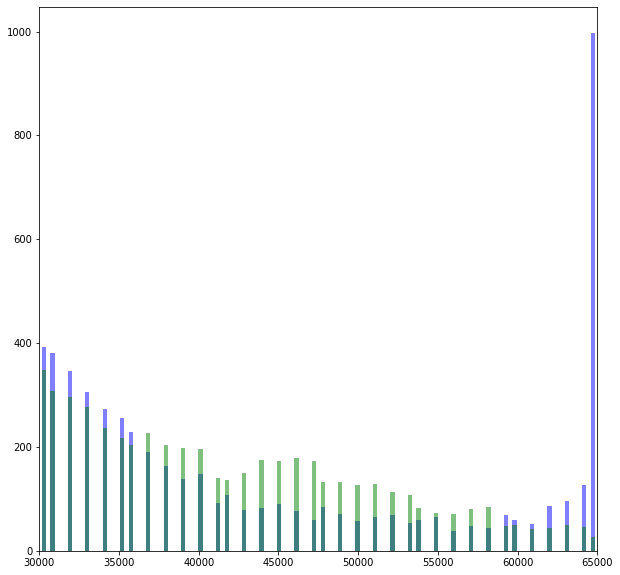

In [72]:
fig = plt.figure(figsize=(10,10))
bins = np.linspace(threshold, data.max(), 65)
plt.xlim([threshold, data.max()])


ax1 = sns.distplot(blue, bins, kde=False, hist_kws={"rwidth":0.5,'color':'b', 'alpha':0.5})
#ax2 = sns.distplot(red, bins, kde=False, hist_kws={"rwidth":0.5,'color':'r', 'alpha':0.5})
ax3 = sns.distplot(green, bins, kde=False, hist_kws={"rwidth":0.5,'color':'g', 'alpha':0.5})

plt.show()